In [9]:
using AlgebraicPetri

using OrdinaryDiffEq
using StochasticDiffEq
using DiffEqJump
using Plots
using LabelledArrays
using Catlab
using Catlab.Graphics
using Catlab.WiringDiagrams
using Catlab.CategoricalAlgebra
using Catlab.Programs.RelationalPrograms
using Catlab, Catlab.CategoricalAlgebra, Catlab.WiringDiagrams, Catlab.Programs, Catlab.Graphics
using AlgebraicPetri 

display_uwd(ex) =draw(uwd::AbstractUWD; kwargs...) = to_graphviz(uwd, junction_labels=:variable, box_labels=:name; kwargs...);  to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>".75"));


In [4]:
sirLabeled = LabelledPetriNet([:S, :I, :R], :inf=>((:S,:I)=>(:I,:I)), :rec=>(:I=>:R)) 

LabelledPetriNet with elements T = 1:2, S = 1:3, I = 1:3, O = 1:3
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │   inf │
│ 2 │   rec │
└───┴───────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     I │
│ 3 │     R │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  2 │
│ 3 │  2 │  2 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  1 │  2 │
│ 3 │  2 │  3 │
└───┴────┴────┘

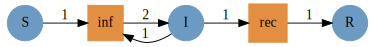

In [6]:
Graph(sirLabeled)

In [34]:
openSIRLabeled = Open(sirLabeled, [:S]);

In [35]:
vaccineWaning = LabelledPetriNet([:S, :VFull, :VPartial], :wane1=>(:VFull=>:VPartial), :wane2=>(:VPartial=>:S)) 


LabelledPetriNet with elements T = 1:2, S = 1:3, I = 1:2, O = 1:2
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │ wane1 │
│ 2 │ wane2 │
└───┴───────┘
┌───┬──────────┐
│ S │    sname │
├───┼──────────┤
│ 1 │        S │
│ 2 │    VFull │
│ 3 │ VPartial │
└───┴──────────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  2 │
│ 2 │  2 │  3 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  3 │
│ 2 │  2 │  1 │
└───┴────┴────┘

In [32]:
openVaccineWaning = Open(vaccineWaning, [:VFull],[:S]);

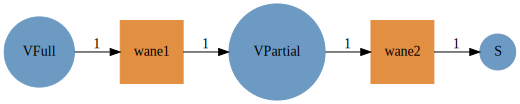

In [12]:
Graph(vaccineWaning)

In [13]:
vaccineHCWDoseAlone = LabelledPetriNet([:S, :H, :D, :VFull], :vacc=>((:S,:D, :H)=>(:VFull, :H))) 

LabelledPetriNet with elements T = 1:1, S = 1:4, I = 1:3, O = 1:2
┌───┬───────┐
│ T │ tname │
├───┼───────┤
│ 1 │  vacc │
└───┴───────┘
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     S │
│ 2 │     H │
│ 3 │     D │
│ 4 │ VFull │
└───┴───────┘
┌───┬────┬────┐
│ I │ it │ is │
├───┼────┼────┤
│ 1 │  1 │  1 │
│ 2 │  1 │  3 │
│ 3 │  1 │  2 │
└───┴────┴────┘
┌───┬────┬────┐
│ O │ ot │ os │
├───┼────┼────┤
│ 1 │  1 │  4 │
│ 2 │  1 │  2 │
└───┴────┴────┘

In [29]:
openVaccineHCWDoseAlone = Open(vaccineHCWDoseAlone, [:S], [:VFull]);

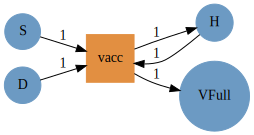

In [30]:
Graph(vaccineHCWDoseAlone)

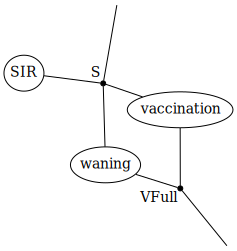

In [25]:
SIRVaxWaningCompositionPattern = @relation (S, VFull) begin
  SIR(S)
  vaccination(S, VFull)
  waning(VFull, S)
end

draw(SIRVaxWaningCompositionPattern, edge_attrs=Dict(:len => "1"))

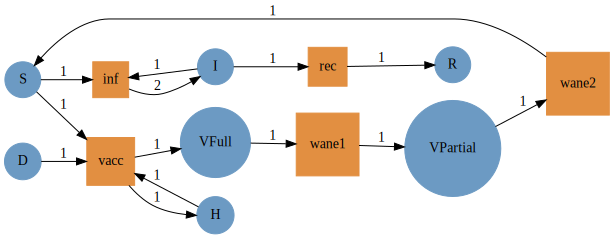

In [36]:
SIRVaxWaningCompositionConcrete = oapply(SIRVaxWaningCompositionPattern, Dict(
  :SIR => openSIRLabeled,
  :waning => openVaccineWaning,
  :vaccination => openVaccineHCWDoseAlone
))

Graph(SIRVaxWaningCompositionConcrete)